### 1. Import Data

In [2]:
from math import pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import sys 
import os
sys.path.append(os.path.abspath("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/fix/preprocessing_data"))
from preprocessing_data import preprocessingData
from preprocessing_data import preprocessingData_onehotencoder
from __future__ import print_function, division
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Using TensorFlow backend.


### 2. Calling Data

In [3]:
world_cup_2018 = pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_train/data_full_train_2018.csv", delimiter= ',')
data_test_world_cup_2018 = pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/data_test/data_penyisihan.csv", delimiter= ',')

### 3. Preparation Data Training

In [5]:
independent_data_train,dependent_data_train= preprocessingData(world_cup_2018)

[SoftImpute] Max Singular Value of X_init = 11161.378545
[SoftImpute] Iter 1: observed MAE=2.376298 rank=6
[SoftImpute] Iter 2: observed MAE=2.335569 rank=6
[SoftImpute] Iter 3: observed MAE=2.329309 rank=6
[SoftImpute] Iter 4: observed MAE=2.328860 rank=6
[SoftImpute] Iter 5: observed MAE=2.329382 rank=6
[SoftImpute] Iter 6: observed MAE=2.330093 rank=6
[SoftImpute] Iter 7: observed MAE=2.330821 rank=6
[SoftImpute] Iter 8: observed MAE=2.331544 rank=6
[SoftImpute] Iter 9: observed MAE=2.332257 rank=6
[SoftImpute] Iter 10: observed MAE=2.332959 rank=6
[SoftImpute] Iter 11: observed MAE=2.333654 rank=6
[SoftImpute] Iter 12: observed MAE=2.334338 rank=6
[SoftImpute] Iter 13: observed MAE=2.335020 rank=6
[SoftImpute] Iter 14: observed MAE=2.335707 rank=6
[SoftImpute] Iter 15: observed MAE=2.336408 rank=6
[SoftImpute] Iter 16: observed MAE=2.337134 rank=6
[SoftImpute] Iter 17: observed MAE=2.337882 rank=6
[SoftImpute] Iter 18: observed MAE=2.338658 rank=6
[SoftImpute] Iter 19: observed MAE

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold
C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
print('5 independent_data train pertama :')
independent_data_train.head(5)

5 independent_data train pertama :


home_team       away_team  home_score  away_score  HTRF  THFP  PHPAR  \
0    Greece  Korea Republic           1           1  18.0   3.0   73.0   
1   Nigeria           Ghana           1           0  33.0   5.0   70.0   
2  Cameroon     Ivory Coast           1           1  59.0   7.0   69.0   
3   Nigeria     Ivory Coast           0           1  33.0   5.0   70.0   
4       USA           Japan           3           2  31.0  10.0   70.0   

   PHSPAR  PHPSAR  PHDAR  ...    PHAAR  ATRF  TAFP  PAPAR  PASPAR  PAPSAR  \
0    66.0    79.0   62.0  ...     28.0  56.0   9.0   72.0    67.0    78.0   
1    64.0    80.0   61.0  ...     25.0  23.0   3.0   71.0    66.0    80.0   
2    64.0    81.0   63.0  ...     26.0  17.0   3.0   72.0    65.0    80.0   
3    64.0    80.0   61.0  ...     25.0  17.0   3.0   72.0    65.0    80.0   
4    66.0    80.0   62.0  ...     27.0  44.0   5.0   72.0    66.0    74.0   

   PADAR  PATSA  PADBAR  PAAAR  
0   62.0   77.0    73.0   26.0  
1   63.0   81.0    74.0   25.0  
2   62.0   80.0    73.0   27.0  
3   62.0   80.0    73.0   27.0  
4   63.0   73.0    72.0   27.0  

[5 rows x 22 columns]

In [9]:
print('5 dependent data train pertama : ')
dependent_data_train.head(5)

5 dependent data train pertama : 


Hasil
0      1
1      2
2      1
3      0
4      2

###### Keterangan
* Hasil Draw dilabeli 0
* Hasil Home Win dilabeli 1
* Hasil Away Win dilabeli 2

### 4. Visualization Data

4.1. Perbandingan pada parameter hasil

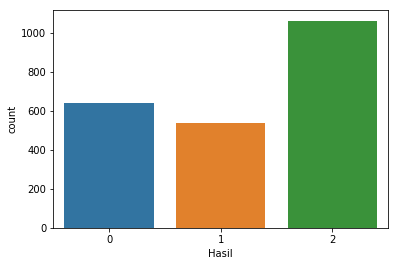

In [10]:
sns.countplot(dependent_data_train["Hasil"],label="Count") 

4.2. Perbandingan umur pada team home

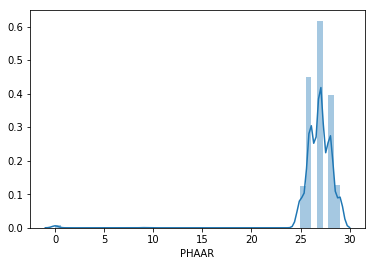

In [11]:
sns.distplot(independent_data_train.PHAAR)

4.3. Perbandingan umur pada team away

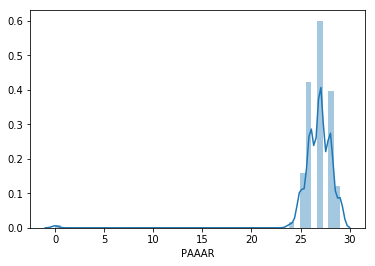

In [12]:
sns.distplot(independent_data_train.PAAAR)

4.4. Relasi setiap atribut pada data training

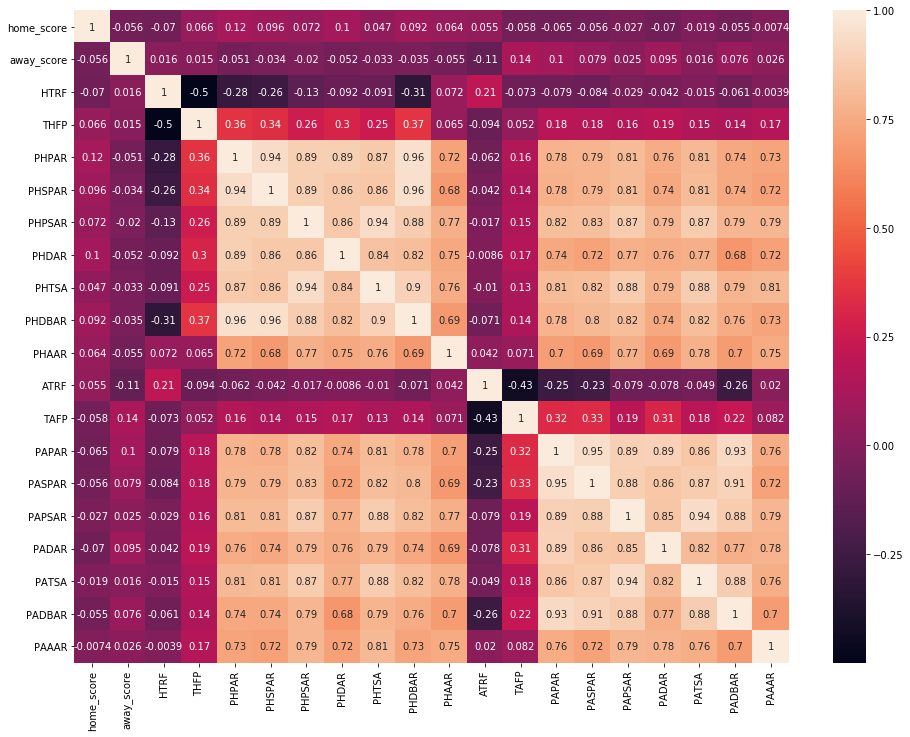

In [13]:
corr = independent_data_train.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [39]:

data=pd.read_csv('C:/Users/Wahyu Nainggolan/Documents/TA Gue/TA_2/Implementasi/Data/2018/Average_rating_country_2018.csv').drop('Age', axis = 1)
data

Country Name  Passing  Shoot Power  Physic  Defence  Top Speed  \
0           Russia       73           64      78       66         75   
1     Saudi Arabia       65           56      73       62         76   
2            Egypt       68           61      73       63         72   
3          Uruguay       73           66      78       68         76   
4         Portugal       74           67      78       67         77   
5             Iran       66           59      74       60         73   
6           France       77           66      82       72         79   
7        Australia       69           63      77       66         74   
8             Peru       69           65      76       61         76   
9          Denmark       73           64      78       65         73   
10       Argentina       78           69      80       68         77   
11         Iceland       70           62      75       65         71   
12         Croatia       74           66      77       65         74   
13         Nigeria       67           58      79       62         77   
14          Brazil       76           66      77       68         80   
15     Switzerland       73           66      80       69         75   
16      Costa Rica       68           60      74       65         75   
17          Serbia       72           64      80       65         74   
18         Germany       79           71      79       65         78   
19          Mexico       72           62      75       65         77   
20          Sweden       70           64      77       64         71   
21  Korea Republic       66           57      76       64         75   
22         Belgium       75           67      83       66         76   
23          Panama       64           57      74       60         73   
24         Senegal       68           64      78       67         76   
25        Colombia       73           67      79       63         78   
26           Japan       73           66      75       67         75   
27           Spain       82           69      78       67         76   
28          Maroko       72           64      77       63         76   
29         Tunisia       67           61      71       62         72   
30         England       73           66      77       68         80   
31        Polandia       70           63      78       64         74   

    Dribbling  
0          68  
1          65  
2          67  
3          74  
4          75  
5          65  
6          73  
7          68  
8          69  
9          69  
10         77  
11         67  
12         71  
13         66  
14         77  
15         71  
16         67  
17         71  
18         78  
19         71  
20         67  
21         67  
22         72  
23         63  
24         69  
25         74  
26         73  
27         79  
28         73  
29         65  
30         74  
31         67

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


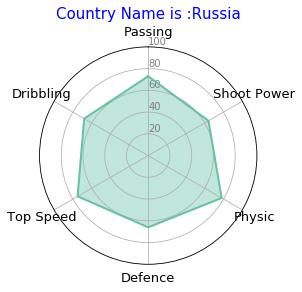

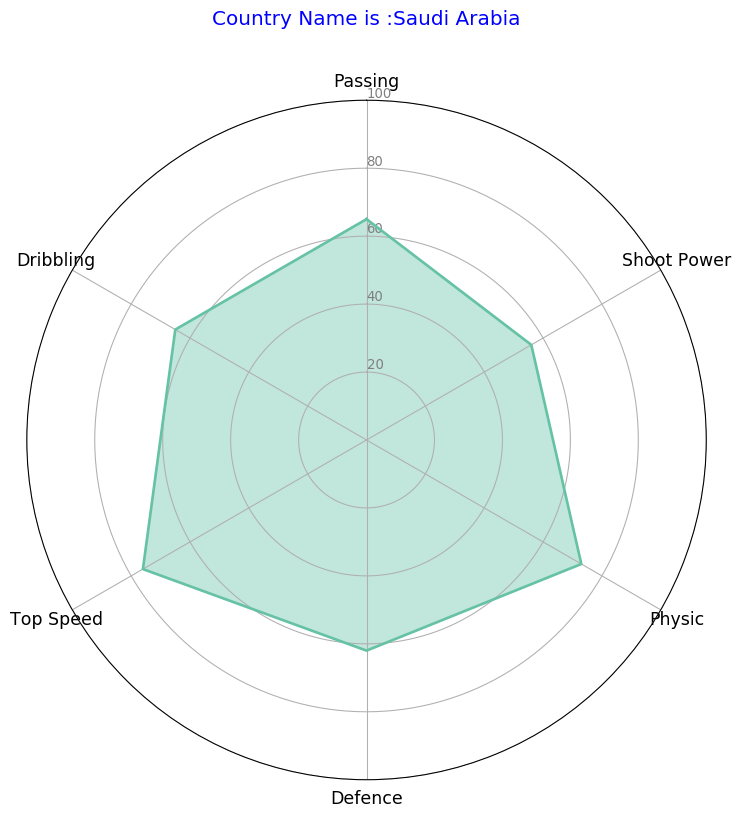

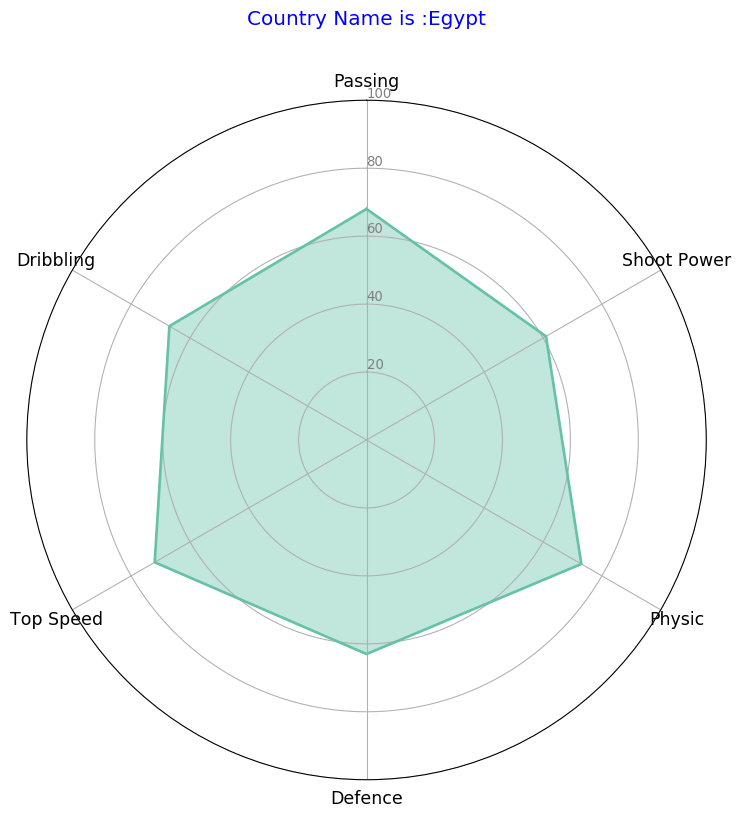

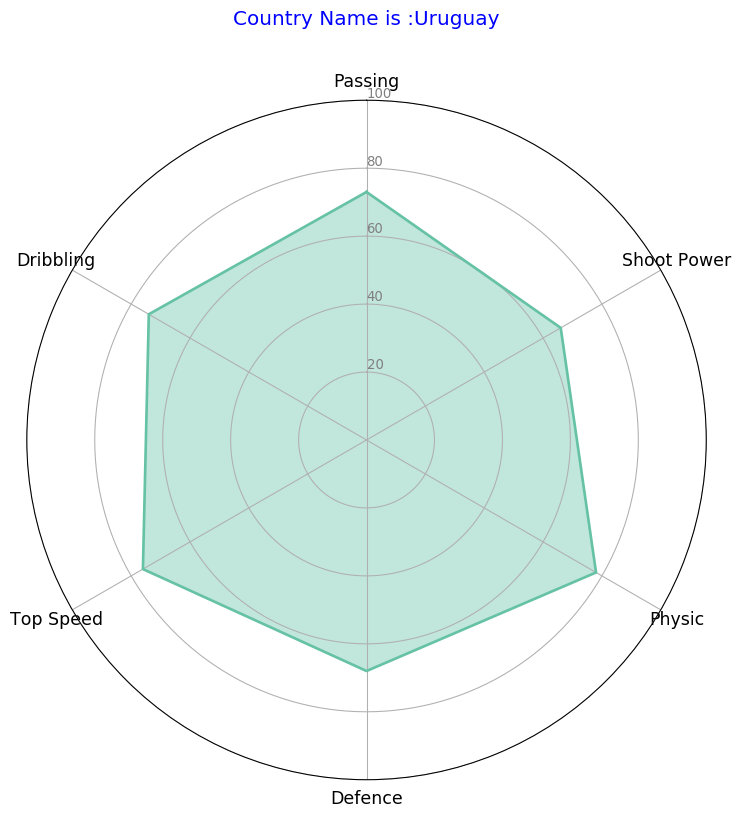

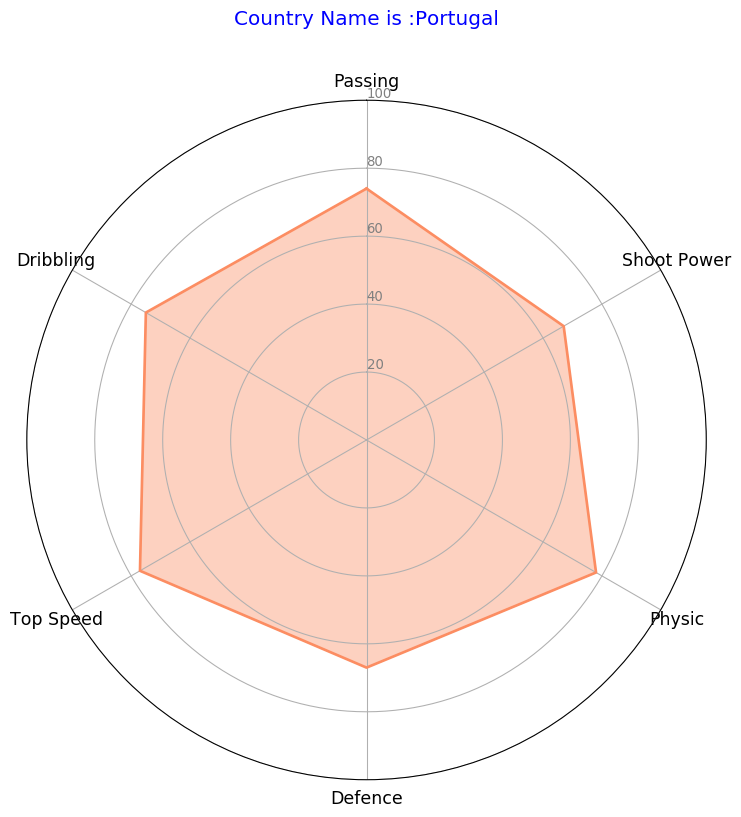

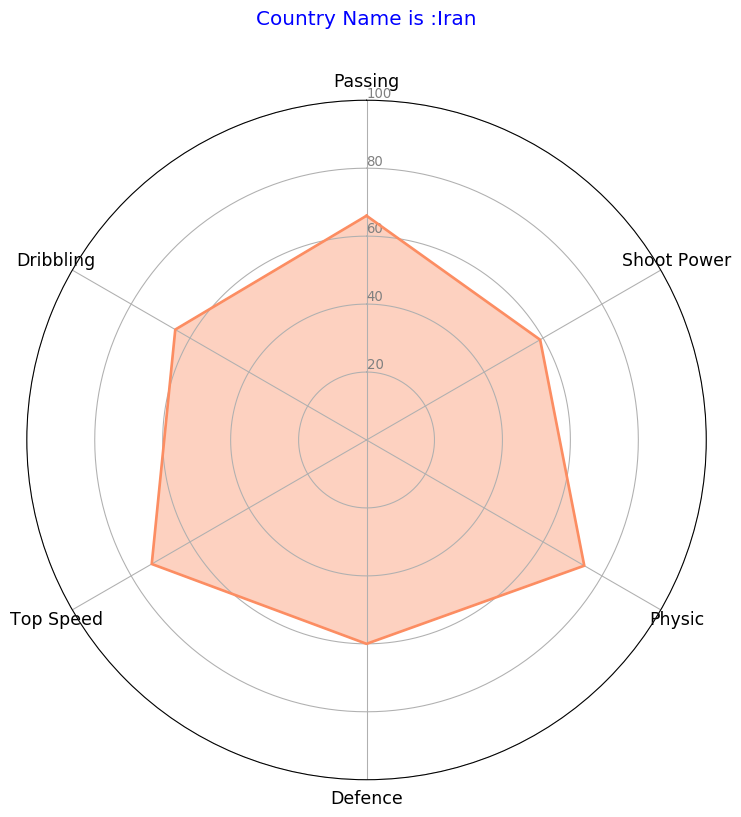

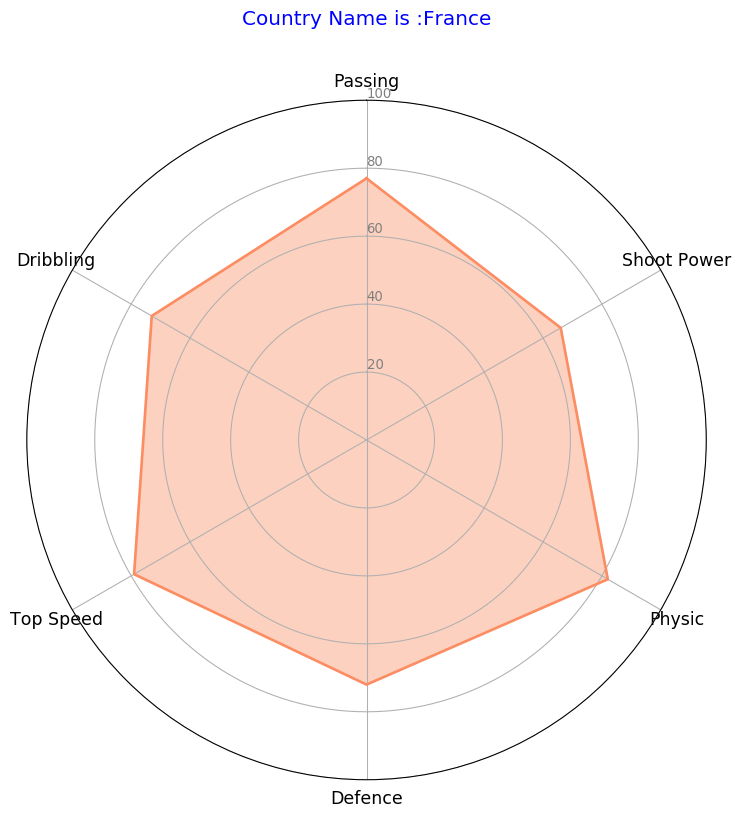

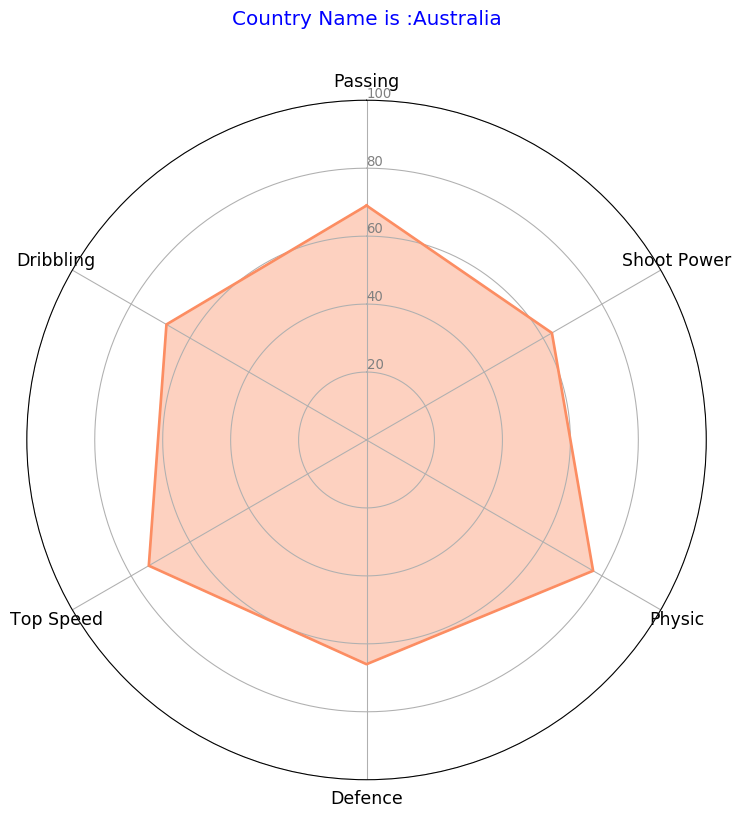

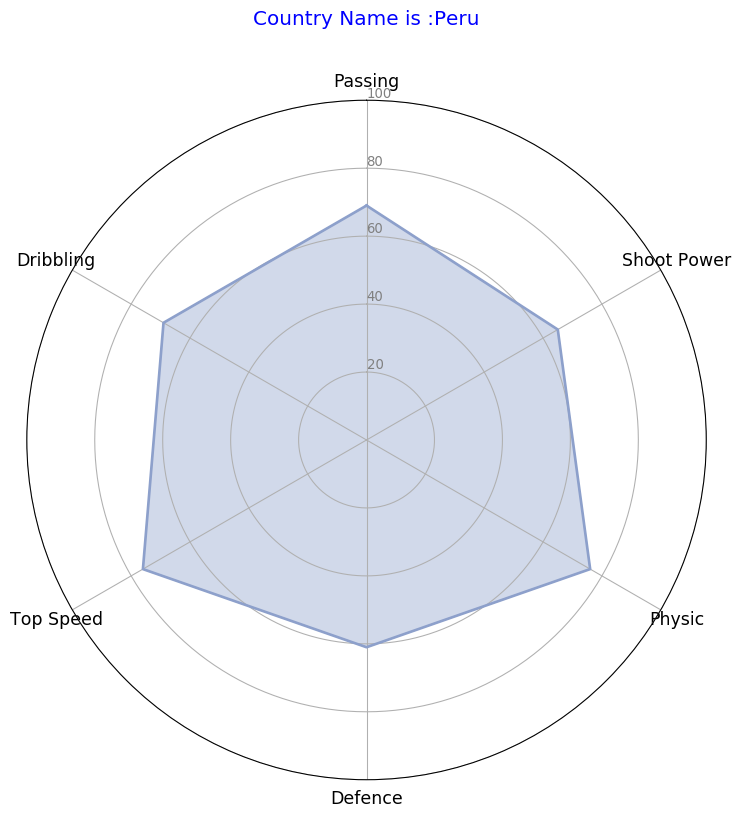

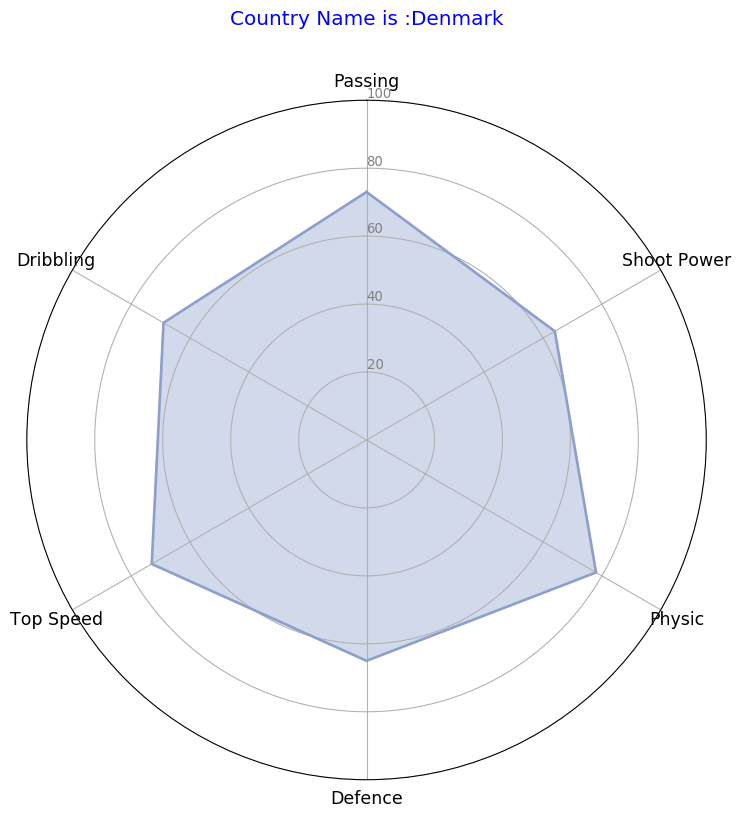

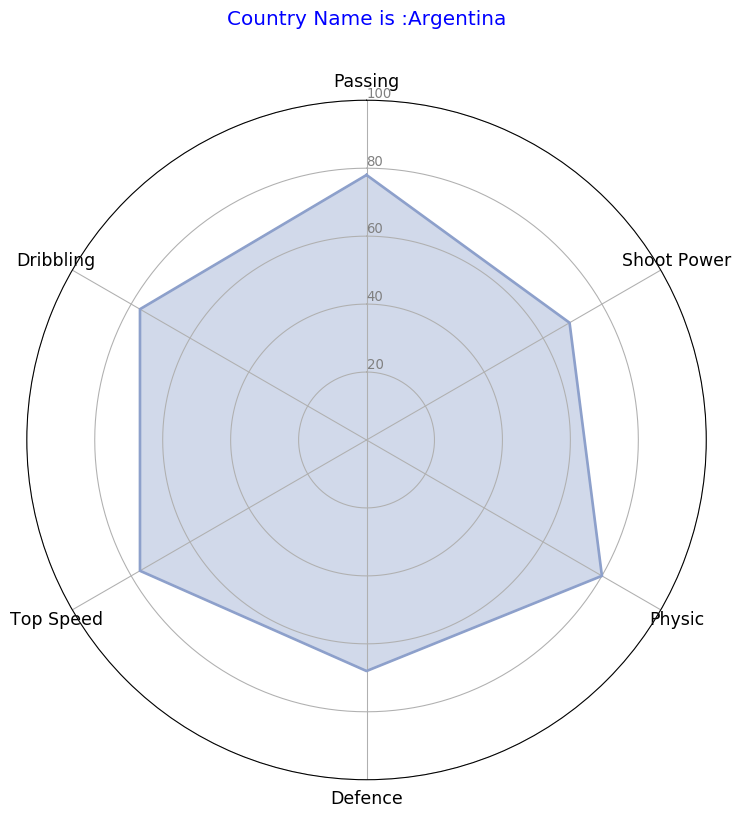

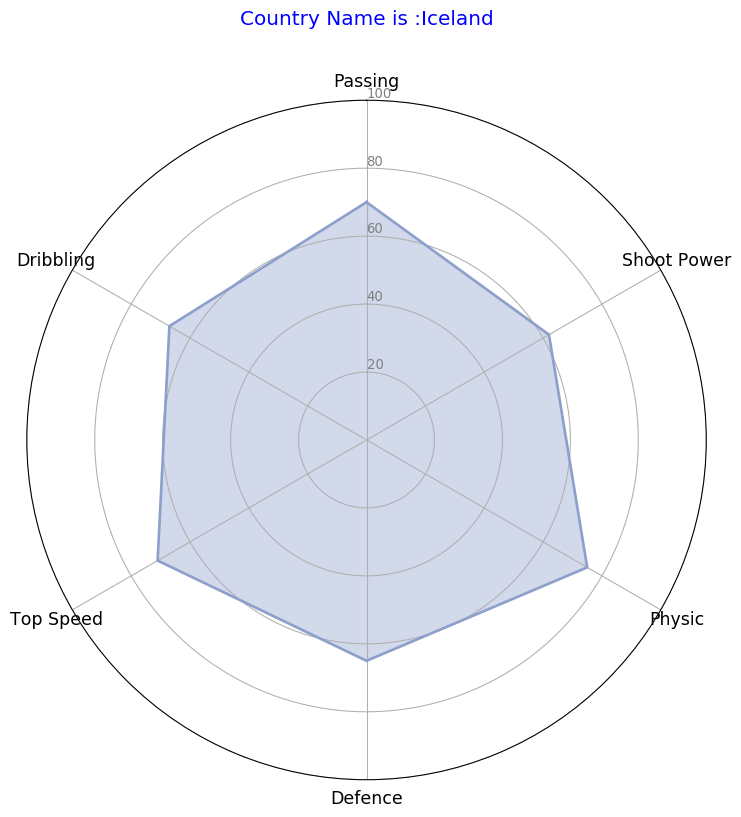

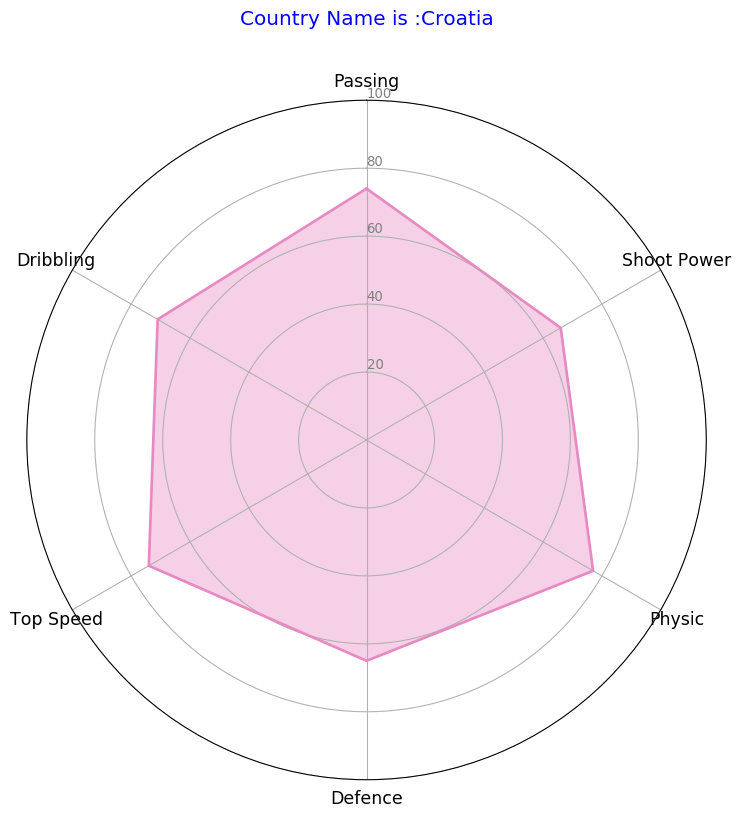

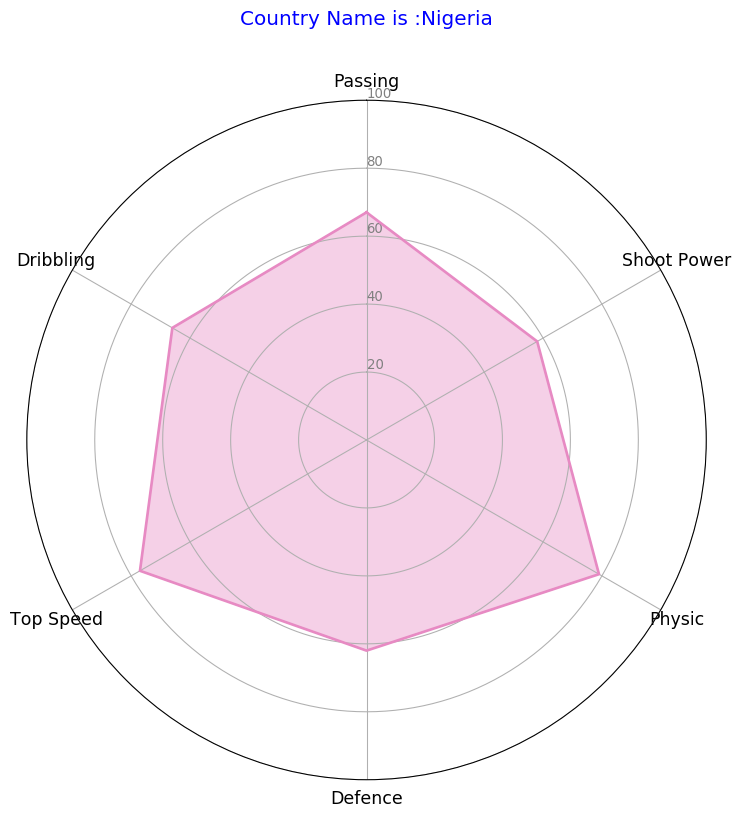

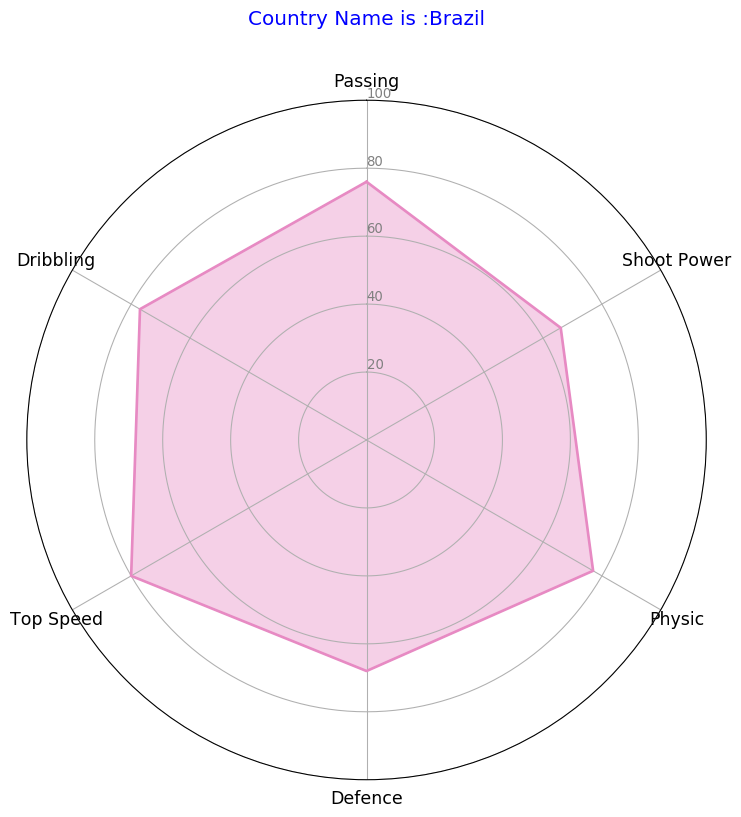

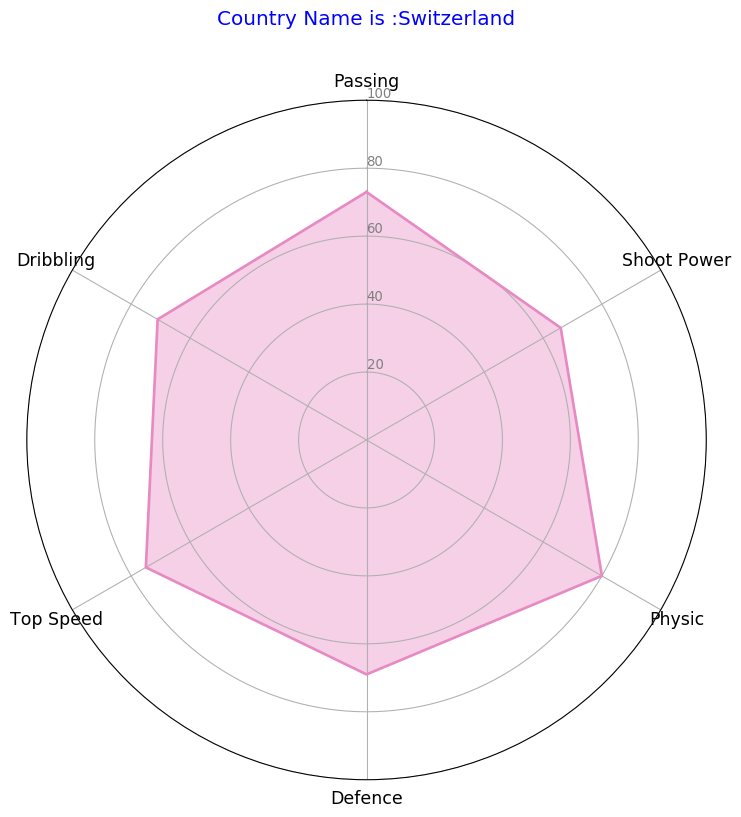

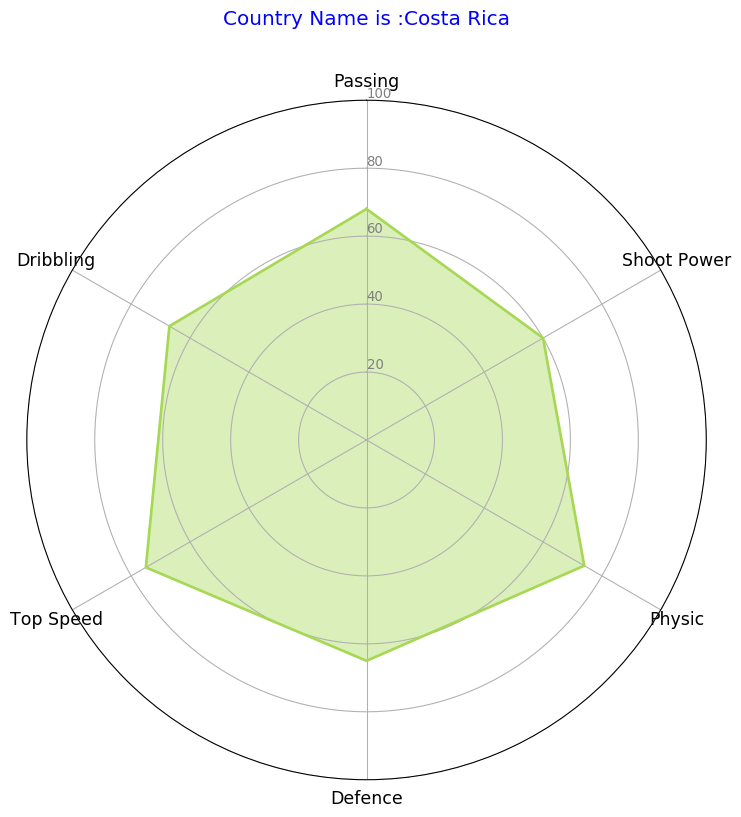

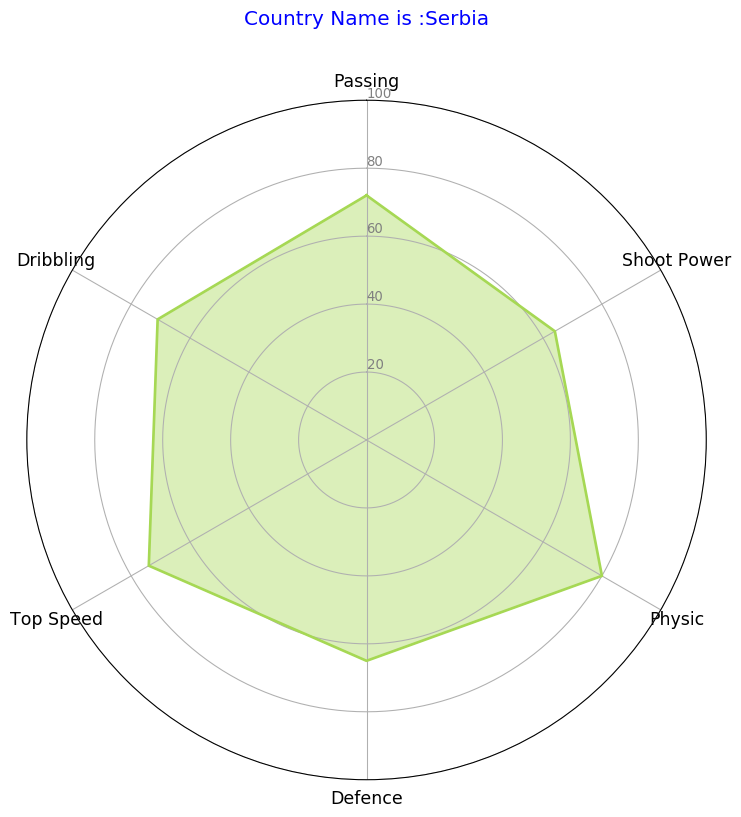

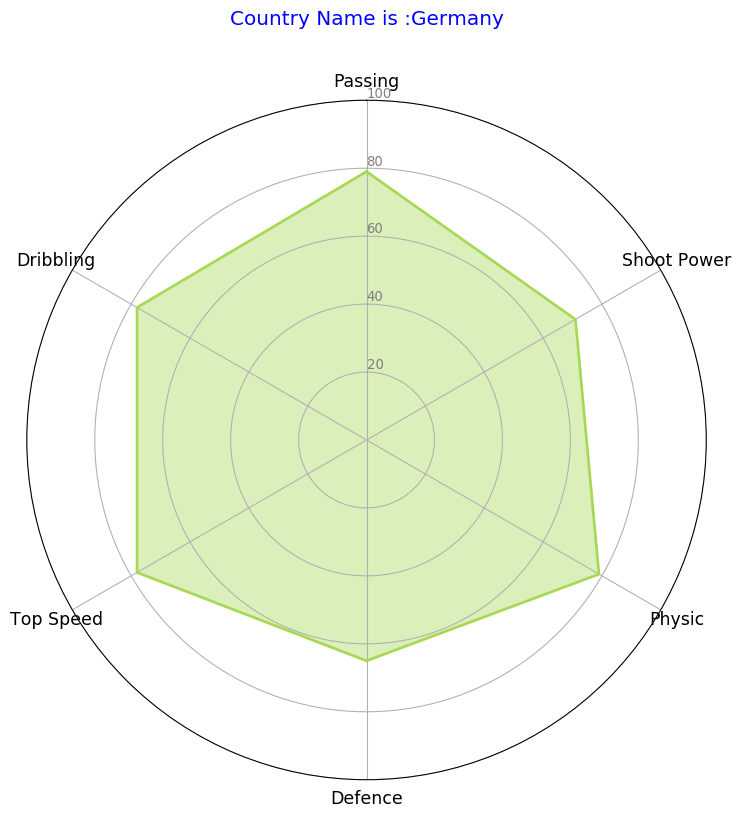

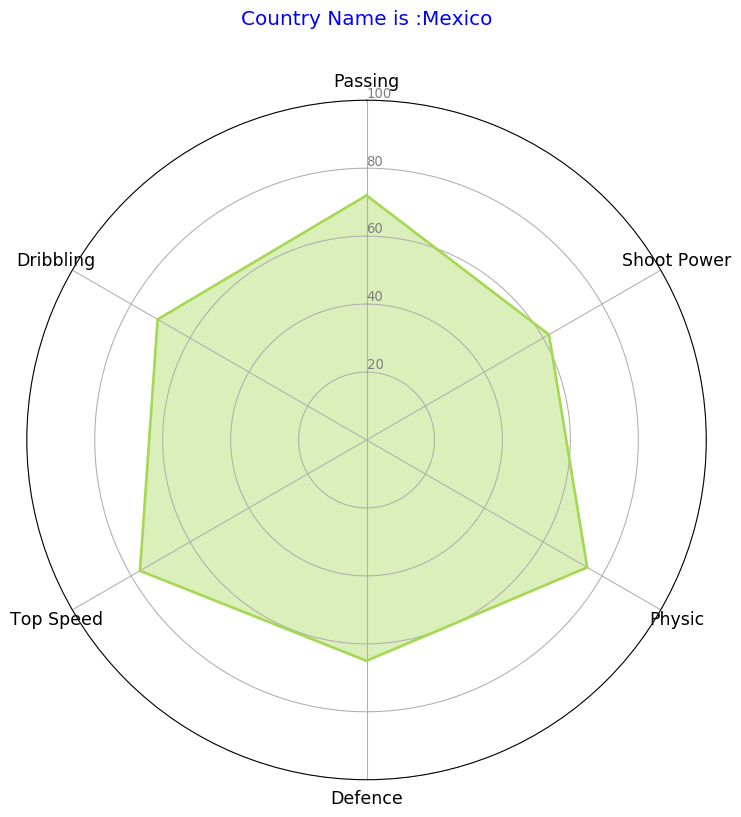

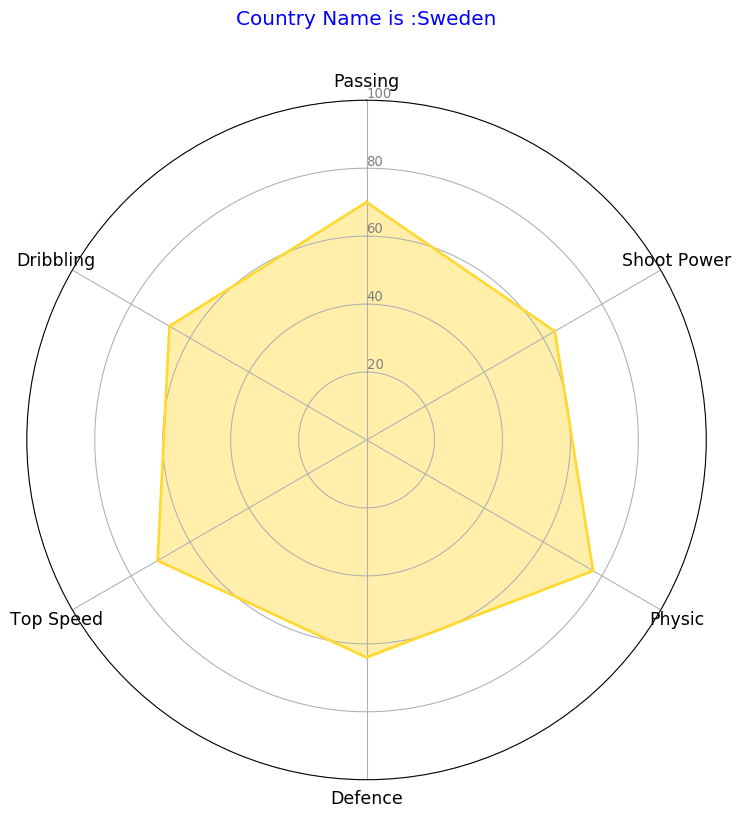

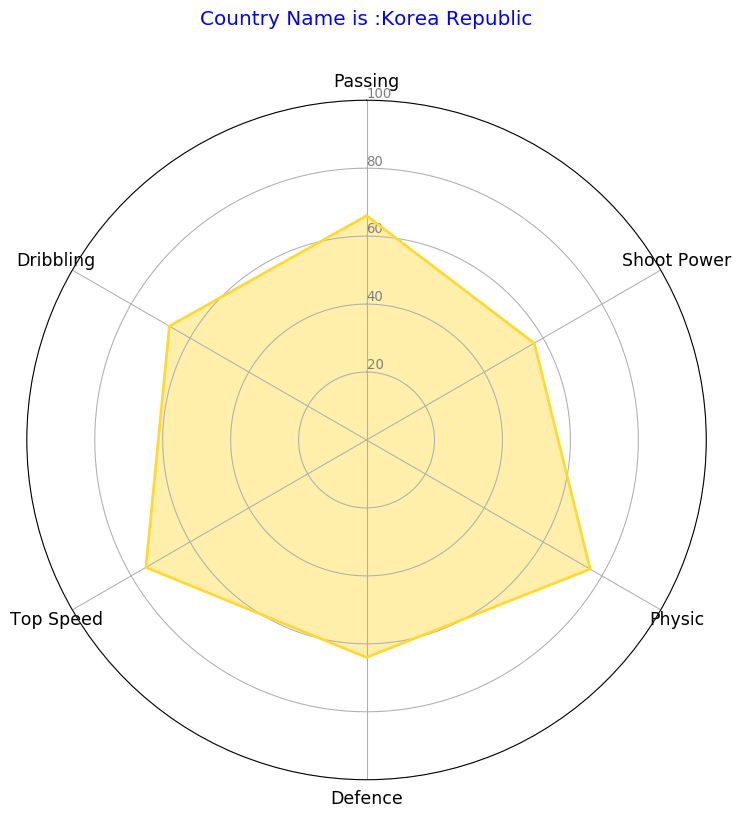

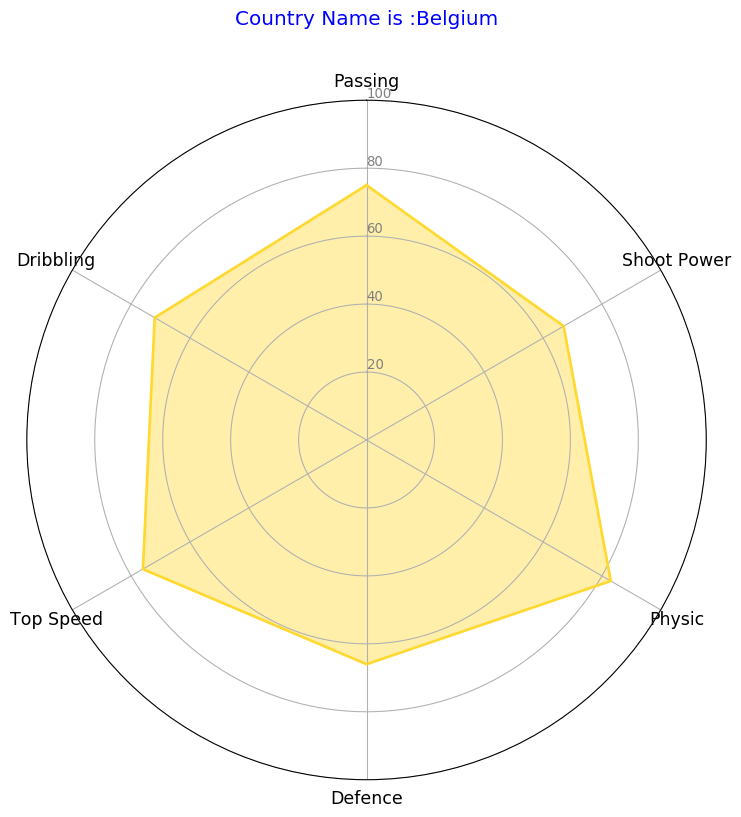

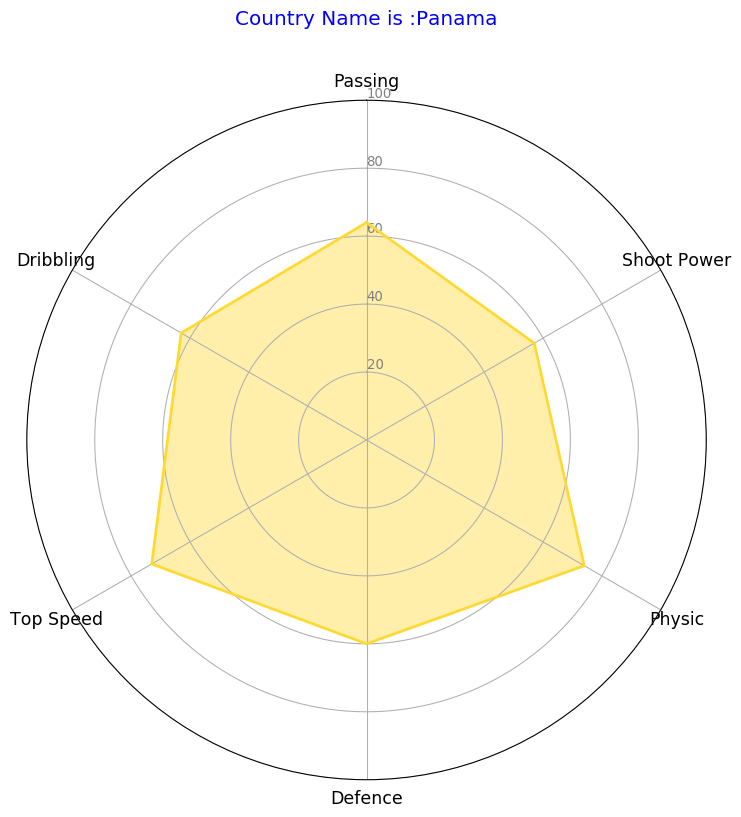

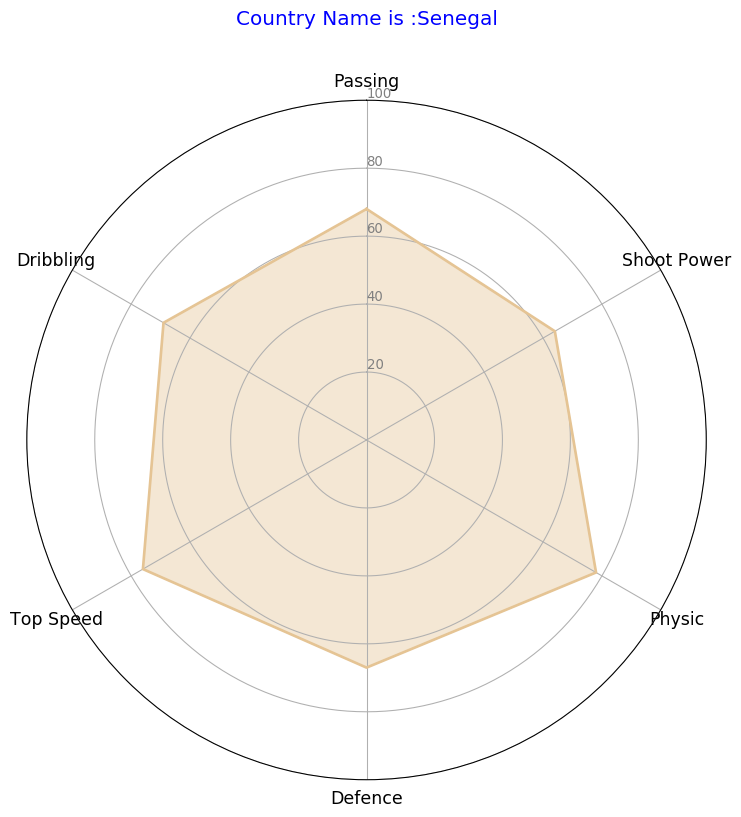

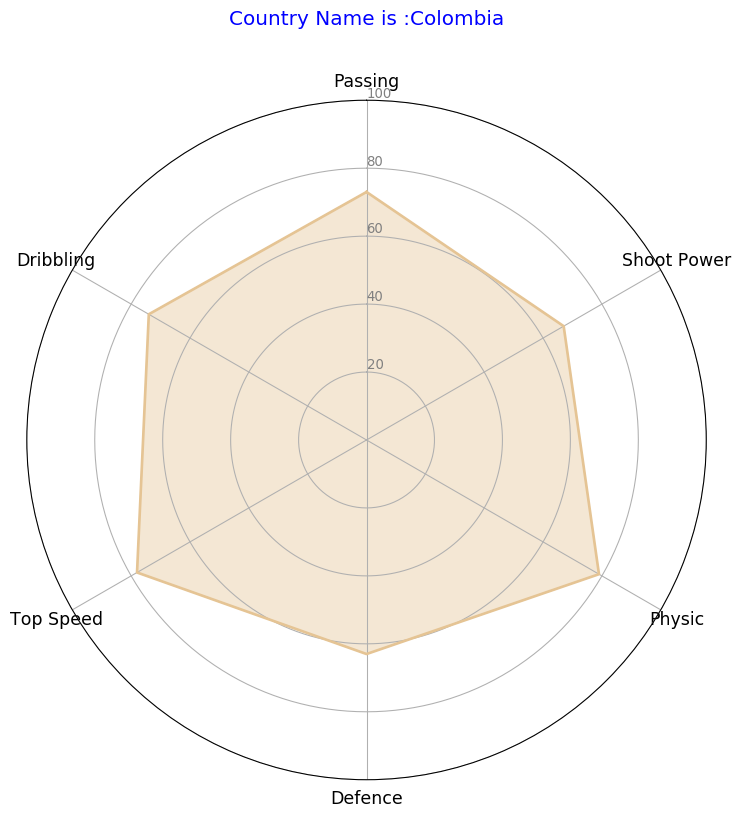

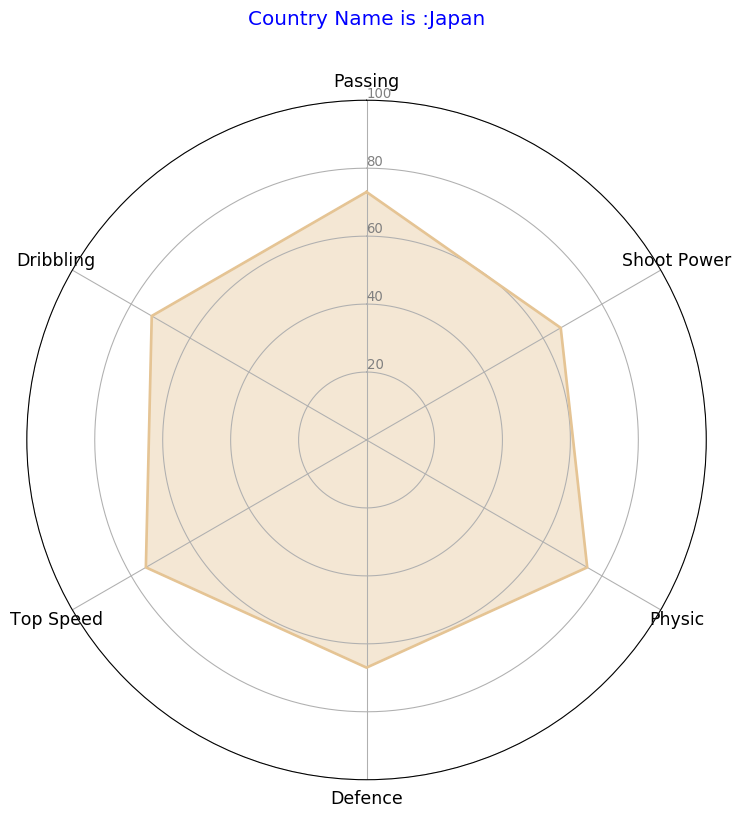

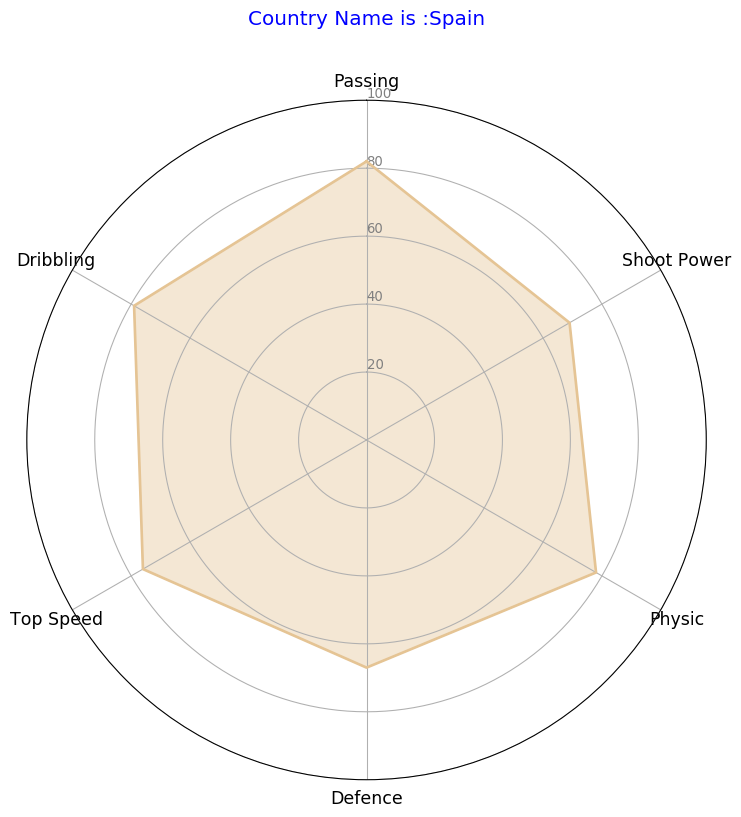

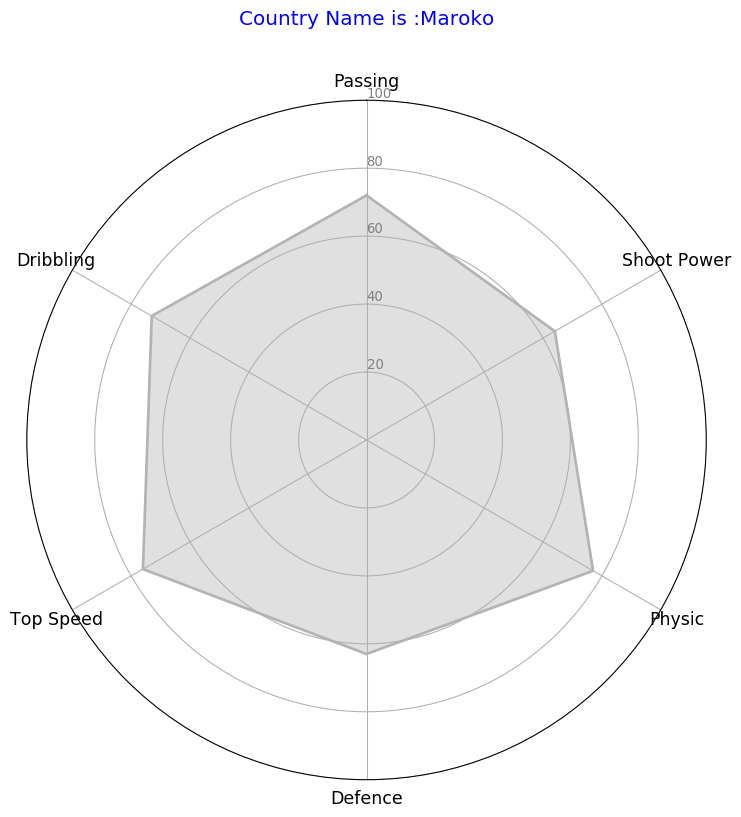

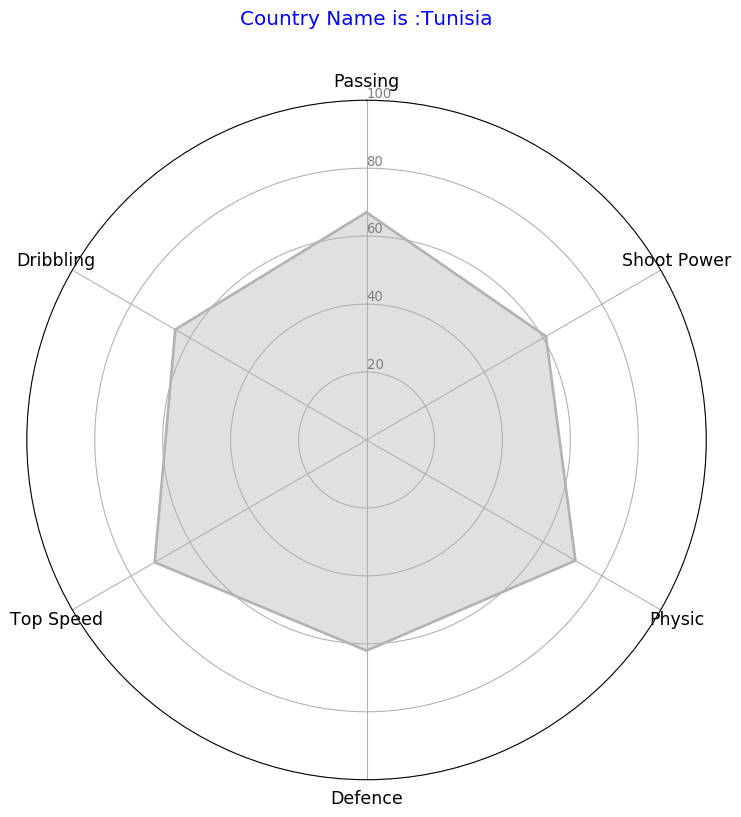

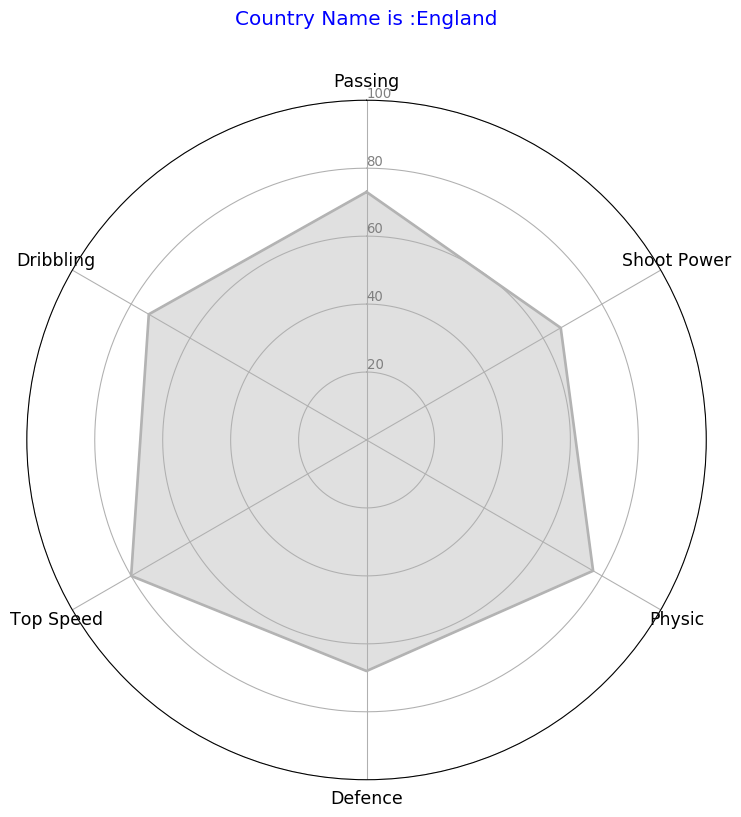

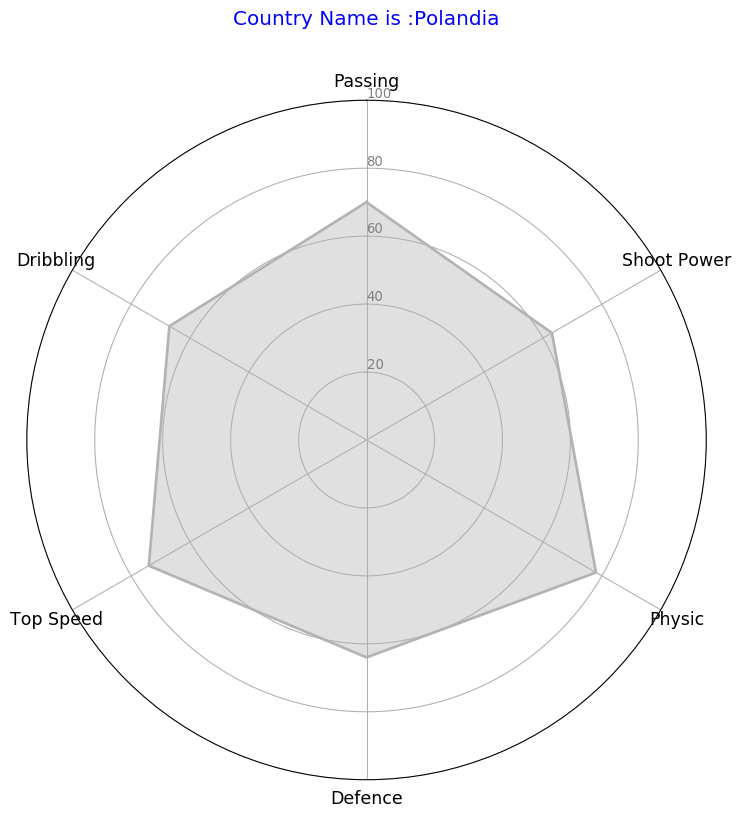

In [40]:
 
def make_spider( row, title, color):
 
# number of variable
    categories=list(data)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
# Initialise the spider plot
    ax = plt.subplot(111, polar=True, )
 
# If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=13)
 
# Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=10)
    plt.ylim(0,100)
 
# Ind1
    values=data.loc[row].drop('Country Name').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
# Add a title
    plt.title(title, size=15, color='blue', y=1.1)
 
# ------- PART 2: Apply to all individuals
# initialize the figure
    my_dpi=96
    plt.figure(figsize=(900/my_dpi, 900/my_dpi), dpi=my_dpi)
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(data.index))
 
# Loop to plot
for row in range(0, len(data.index)):
    make_spider( row=row, title='Country Name is :'+data['Country Name'][row], color=my_palette(row))
    